In [55]:
sess = tf.Session(config=tf.ConfigProto(
gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction = 0.4), log_device_placement=True))

# p944 


(1, 3, 3, 1)


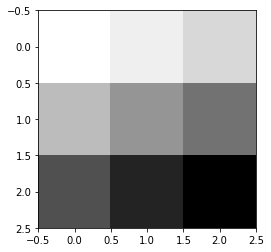

In [41]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sess=tf.InteractiveSession()
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print(image.shape)

plt.imshow(image.reshape(3,3),cmap='Greys')
sess.close()

# p948 위



conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]]


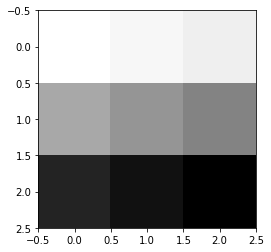

In [62]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sess=tf.InteractiveSession()

image=np.arange(1,50,dtype=np.float32).reshape(1,7,7,1)
w_filter=tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1)*2)    
# = w_filter=tf.constant(np.full((3,3),2,dtype=np.float32).reshape(3,3,1,1))
conv2d=tf.nn.conv2d(input=image,filter=w_filter, strides=[1,2,2,1],padding='VALID') 
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))

plt.imshow(conv2d_img.reshape(3,3),cmap='Greys')
                     
sess.close()



# p954 padding 비교


In [67]:
sess=tf.InteractiveSession()

image=np.ones(25,dtype=np.float32).reshape(1,5,5,1)
w_filter=tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1))    

conv2d=tf.nn.conv2d(input=image,filter=w_filter, strides=[1,1,1,1],padding='SAME') 
conv2d_V=tf.nn.conv2d(input=image,filter=w_filter, strides=[1,1,1,1],padding='VALID') 
print(conv2d.eval().reshape(5,5))


print()
print(print(conv2d_V.eval().reshape(3,3)))
sess.close()

[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]]

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]
None


# p958 polling 

In [78]:
sess=tf.InteractiveSession()

image=np.arange(1,17,dtype=np.float32).reshape(1,4,4,1)
max_pool=tf.nn.max_pool(image,ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
max_pool_s=tf.nn.max_pool(image,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
avg_pool=tf.nn.avg_pool(image,ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

print(max_pool.eval().shape)
print("max_pool")
print(max_pool.eval().reshape(2,2))
print("max_pool_s")
print(max_pool_s.eval().reshape(2,2))
print("avg_pool")
print(avg_pool.eval().reshape(2,2))

sess.close()

(1, 2, 2, 1)
max_pool
[[ 6.  8.]
 [14. 16.]]
max_pool_s
[[ 6.  8.]
 [14. 16.]]
avg_pool
[[ 3.5  5.5]
 [11.5 13.5]]


# p975

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


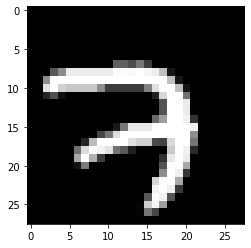

In [83]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

img=mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img,cmap='gray')




Tensor("Conv2D_26:0", shape=(1, 14, 14, 5), dtype=float32)


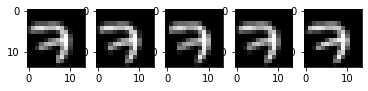

In [97]:
sess=tf.InteractiveSession()
img=img.reshape(1,28,28,1)
w_filter=np.random.random((3,3,1,5))
conv2d=tf.nn.conv2d(img,w_filter,strides=[1,2,2,1],padding='SAME')
print(conv2d)

conv2d_img=conv2d.eval()
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap='gray')
    
sess.close()

# p977


In [1]:
from PIL import Image as Im
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lena=Im.open('C:/Users/Affinity/Desktop/lecture/temp-master/temp-master/lena.jpg')
Lena.size
#Lena.show()    #이미지 보기
Lena=Lena.resize((200,200)) #크기를 200x200으로
Lena=Lena.convert('L') # 흑백화면으로
Lena=np.array(Lena,dtype=np.float32)  # 행렬로
Lena=Lena.reshape(1,200,200,1)
Lena.shape  #[1,200,200,1]=[batch,ht,wdth,channel 수]
K1=tf.constant([[[[-1.]],[[-1.]],[[-1.]]],[[[-1.]],[[9.]],[[-1.]]],[[[-1.]],[[-1.]],[[-1.]]]])
#K1 size=(3,3,1,1)=[ht,wdth,channel, 개수]

a1=tf.nn.conv2d(Lena,K1,strides=[1,1,1,1],padding='VALID')

sess=tf.Session()
a1=sess.run(a1)
a1.shape  #= [1,198,198,1]= [channel수 , ht , wdth ,batch] 
a1_img=np.swapaxes(a1,0,3)   #axis0 과 3을 서로 바꾸기 => [1,198,198,1]=[batch,ht,wdth,chnnel수]
a1_img.shape

#최대값 풀링(2)
h1=tf.nn.max_pool(a1_img,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

h1=sess.run(h1)
print(h1.shape)   #[1,198,198,1]=[batch, ht,wdth,channel 수]
plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200),cmap='Greys')
plt.subplot(1,3,2)
plt.imshow(a1_img.reshape(198,198),cmap="Greys")
plt.subplot(1,3,3)
plt.imshow(h1.reshape(99,99),cmap='Greys')

(1, 99, 99, 1)


#  필터값 변경 

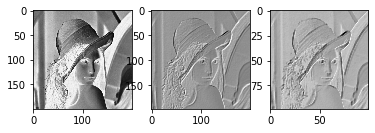

In [110]:
from PIL import Image as Im
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lena=Im.open('C:/Users/Affinity/Desktop/lecture/temp-master/temp-master/lena.jpg')
Lena.size
#Lena.show()    #이미지 보기
Lena=Lena.resize((200,200)) #크기를 200x200으로
Lena=Lena.convert('L') # 흑백화면으로
Lena=np.array(Lena,dtype=np.float32)  # 행렬로
Lena=Lena.reshape(1,200,200,1)
Lena.shape  #[1,200,200,1]=[batch,ht,wdth,channel 수]
K1=tf.constant([[[[-2.]],[[-1.]],[[0.]]],[[[-1.]],[[1.]],[[1.]]],[[[0.]],[[1.]],[[2.]]]])
#K1 size=(3,3,1,1)=[ht,wdth,channel, 개수]

a1=tf.nn.conv2d(Lena,K1,strides=[1,1,1,1],padding='VALID')

sess=tf.Session()
a1=sess.run(a1)
a1.shape  #= [1,198,198,1]= [channel수 , ht , wdth ,batch] 
a1_img=np.swapaxes(a1,0,3)   #axis0 과 3을 서로 바꾸기 => [1,198,198,1]=[batch,ht,wdth,chnnel수]
a1_img.shape

#최대값 풀링(2)
h1=tf.nn.max_pool(a1_img,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

h1=sess.run(h1)
h1.shape   #[1,198,198,1]=[batch, ht,wdth,channel 수]
plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200),cmap='Greys')
plt.subplot(1,3,2)
plt.imshow(a1_img.reshape(198,198),cmap="Greys")
plt.subplot(1,3,3)
plt.imshow(h1.reshape(99,99),cmap='Greys')

# p979


In [112]:
sess=tf.InteractiveSession()

image=np.arange(1,10,dtype=np.float32).reshape(1,3,3,1)
w_filter=np.array([1,1,1,1,2,2,2,2,3,3,3,3],dtype=np.float32).reshape(1,3,2,2)
w_filter=np.swapaxes(w_filter,0,2)
w_filter=np.swapaxes(w_filter,1,3)
conv2d=tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1],padding='SAME')
conv2d_img=conv2d.eval()
conv2d_img=np.swapaxes(conv2d_img,0,3).reshape(3,3,3)
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


# p990


In [3]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data


tf.reset_default_graph()
tf.set_random_seed(777)
mnist = input_data.read_data_sets('/content/drive/My Drive/lecture/l_d/p6/MNIST_data/', one_hot=True)

learning_rate = 0.001
training_epochs = 5
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
print("L1", L1.shape)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L1", L1.shape)


W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
print("L2", L2.shape)

L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L2", L2.shape)

L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

#Final FC 7x7x64 inputs -> 10 oupts
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
    )
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels
    }))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:", sess.run(
tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))


sess.close()



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
L1 (?, 28, 28, 32)
풀링후 :L1 (?, 14, 14, 32)
L2 (?, 14, 14, 64)
풀링후 :L2 (?,

In [1]:
# sess = tf.Session()
# www=tf.random_normal([10])
# sess.run(www)
# qq = tf.placeholder(tf.float32, [None, 784])
# feed_dict={qq:[1,784]}
# print(sess.run(qq,feed_dict=feed_dict))



# 정확도 높이기

In [20]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import time
start=time.time()

tf.reset_default_graph()
tf.set_random_seed(777)
mnist = input_data.read_data_sets('/content/drive/My Drive/lecture/l_d/p6/MNIST_data/', one_hot=True)

learning_rate = 0.001
training_epochs = 20
batch_size = 50

X = (tf.placeholder(tf.float32, [None, 784])/ 255)

X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)




W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
print("L1", L1.shape)
L1 = tf.nn.leaky_relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L1", L1.shape)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)




W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.leaky_relu(L2)
print("L2", L2.shape)

L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L2", L2.shape)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


#Final FC 7x7x64 inputs -> 10 oupts

W3 = tf.Variable(tf.random_normal([3, 3, 64,128 ], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
print("L3", L3.shape)

L3 = tf.nn.leaky_relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L3", L3.shape)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.Variable(tf.random_normal([3, 3, 128,256 ], stddev=0.01))
L4 = tf.nn.conv2d(L3, W4, strides=[1, 1, 1, 1], padding='SAME')
print("L4", L4.shape)

L4 = tf.nn.leaky_relu(L4)
L4 = tf.nn.avg_pool(L4, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
print("풀링후 :L4", L4.shape)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

L4_flat = tf.reshape(L4, [-1, 2 * 2 * 256])

W5 = tf.get_variable("W5", shape=[2 * 2 * 256, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L4_flat, W5) + b
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
    )

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict1 = {X: batch_xs, Y: batch_ys ,keep_prob:0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict1 )
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
 
    print(time.time()-start)
print('Learning Finished!')


# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels, keep_prob:1
    }))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:", sess.run(
tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1],keep_prob:1}))
print(time.time()-start)

sess.close()

Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-labels-idx1-ubyte.gz
L1 (?, 28, 28, 32)
풀링후 :L1 (?, 14, 14, 32)
L2 (?, 14, 14, 64)
풀링후 :L2 (?, 7, 7, 64)
L3 (?, 7, 7, 128)
풀링후 :L3 (?, 4, 4, 128)
L4 (?, 4, 4, 256)
풀링후 :L4 (?, 2, 2, 256)
Learning started. It takes sometime.
Epoch: 0001 cost = 0.735323632
12.882422924041748
Epoch: 0002 cost = 0.102305991
24.649045705795288
Epoch: 0003 cost = 0.071000152
36.481804609298706
Epoch: 0004 cost = 0.058619723
48.41786336898804
Epoch: 0005 cost = 0.050064887
60.415210008621216
Epoch: 0006 cost = 0.047394293
72.46981310844421
Epoch: 0007 cost = 0.044689817
84.56845545768738
Epoch: 0008 cost = 0.039363473
96.74488973617554
Epoch: 0009 cost = 0.038127756
109.1078290939331
Ep

# p996 고수준 API 사용



In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets(".mnist/data/",one_hot=True)

#신경망 모델 구성
X=tf.placeholder(tf.float32,[None,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])
is_training=tf.placeholder(tf.bool)

#기본적으로 input, outputs size.kernel_size

L1=tf.layers.conv2d(X,32,[3,3],activation=tf.nn.relu)
L1=tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1=tf.layers.dropout(L1,0.7,is_training)

L2=tf.layers.conv2d(L1,64,[3,3],activation=tf.nn.relu)
L2=tf.layers.max_pooling2d(L2,[2,2],[2,2])
L2=tf.layers.dropout(L2,0.7,is_training)

L3=tf.contrib.layers.flatten(L2)
L3=tf.layers.dense(L3,256,activation=tf.nn.relu)
L3=tf.layers.dropout(L3,0.5,is_training)

model=tf.layers.dense(L3,10,activation=None)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)


#신경망 모델 학습
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs,batch_ys= mnist.train.next_batch(batch_size)
        batch_xs=batch_xs.reshape(-1,28,28,1)
        _, cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys,is_training:True})
        
        total_cost+=cost_val
        
    print('Epoch:', '%04d' % (epoch+1), 'Avg.cost=', '{:.4f}'.format(total_cost/total_batch))
    
print("최적화 완료")

#결과 확인

is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
              
print("정확도:" ,sess.run(accuracy,
                      feed_dict={X:mnist.test.images.reshape(-1,28,28,1),Y:mnist.test.labls,is_training:False}))


                       
                       
                       

Extracting .mnist/data/train-images-idx3-ubyte.gz
Extracting .mnist/data/train-labels-idx1-ubyte.gz
Extracting .mnist/data/t10k-images-idx3-ubyte.gz
Extracting .mnist/data/t10k-labels-idx1-ubyte.gz


# 1061 컬러이미지 분류


In [7]:
from keras import layers
from keras import models
import os, shutil


# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/Affinity/Downloads/006975-master/006975-master/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/Affinity/Downloads/006975-master/006975-master/datasets/cat-dog'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 하위 디렉토리 및 파일 전체 삭제하기: rmtree()
os.mkdir(base_dir)            #디렉토리 생성  mkdir(),   디렉토리 삭제하기:rmdir()

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')  #os.path.join()  하위 경로 만들기
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    


In [8]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))



훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


# 네트워크 구성하기
이전 예제에서 MNIST를 위해 간단한 컨브넷을 만들었습니다. 이제 컨브넷에 친숙해졌을 것입니다. 여기서 사용할 구조도 일반적으로 동일합니다. Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 만들겠습니다.

이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들겠습니다. Conv2D + MaxPooling2D 단계를 하나 더 추가합니다. 이렇게 하면 네트워크의 용량을 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있습니다. 150 × 150 크기(임의로 선택한 것입니다)의 입력으로 시작해서 Flatten 층 이전에 7 × 7 크기의 특성 맵으로 줄어듭니다.

특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소합니다(150 × 150에서 7 × 7까지). 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴입니다.

이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층)과 sigmoid 활성화 함수로 끝납니다. 이 유닛은 한 클래스에 대한 확률을 인코딩할 것입니다.

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())                            #1차원으로 차원으로 변경 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#  데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

사진 파일을 읽습니다.
JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
그다음 부동 소수 타입의 텐서로 변환합니다.
픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).
좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있습니다. 케라스는 keras.preprocessing.image에 이미지 처리를 위한 헬퍼 도구들을 가지고 있습니다. 특히 ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다. 이 클래스를 사용해 보겠습니다.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break
    
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 10s 97ms/step - loss: 0.6874 - acc: 0.5300 - val_loss: 0.6692 - val_acc: 0.5990 ETA: 3s - loss: 0.6
Epoch 2/10
100/100 [==============================] - 6s 57ms/step - loss: 0.6538 - acc: 0.6095 - val_loss: 0.6644 - val_acc: 0.5900
Epoch 3/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6137 - acc: 0.6495 - val_loss: 0.6550 - val_acc: 0.6130
Epoch 4/10
100/100 [==============================] - 6s 59ms/step - loss: 0.5708 - acc: 0.6945 - val_loss: 0.6937 - val_acc: 0.6100
Epoch 5/10
100/100 [==============================] - 6s 59ms/step - loss: 0.5420 - acc: 0.7165 - val_loss: 0.5765 - val_acc: 0.6910
Epoch 6/10
100/100 [==============================] - 6s 60ms/step - loss: 0.5159 - acc: 0.7360 - val_loss: 0.5936 - val_acc: 0.6710
Epoch 7/10
100/100 [==============================] - 6s 61ms/step - loss: 0.4938 - acc

# 모델 저장


In [14]:
model.save('cats_and_dogs_small_1.h5')

##  그래프 그리기

In [15]:
import matplotlib.pyplot as plt    
###
# matplotlib이란?
# - 그래프를 그려주는 라이브러리로 쉽게 그래프 그리기와 데이터 시각화해주는 도구인데 ,
 #  matplotlib의 pyplot모듈 을 plt 라는 별명으로 붙여  모듈을 불러온다는 것

acc = history.history['acc']                    #저장된 히스토리의 정확도를 나타내는[acc]힝목을 acc에 넣어줌
val_acc = history.history['val_acc']    #저장된 히스토리의 벨리데이션의 정확도를 나타내는[val_acc]힝목을 val_acc에 
loss = history.history['loss']        # 히스토리에서 손실을 나타내는 [loss]힝목을 loss에 넣어줌
val_loss = history.history['val_loss']   # 히스토리에서 벨리데이션의 손실을 나타내는 [val_loss]힝목을 
                                                                 #val_loss에 넣어줌

epochs = range(len(acc))                    #0부터 acc의 길이의 -1 까지 수를 변수epochs 대입 
                                                    #즉 0~29까지
plt.plot(epochs, acc, 'bo', label='Training acc')          # x축을 epochs,y축을 acc 파란색 점, 제목을 Training acc으로 
plt.plot(epochs, val_acc, 'b', label='Validation acc')          #그래프를 그림
plt.title('Training and validation accuracy')              #  그래프 제목을 Training and validation accuracy
plt.legend()                                              #범례는 dfalut 값으로 

plt.figure()                           #plt.figure()를 통해 객체를 생성




plt.plot(epochs, loss, 'bo', label='Training loss')              
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### 이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았습니다. 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소합니다.

비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 배웠습니다. 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해 보겠습니다.

#  데이터 증식 사용하기(변형)

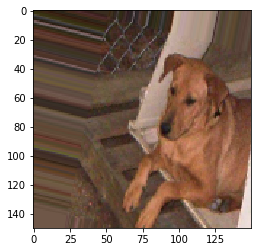

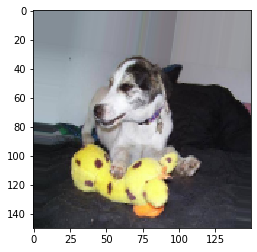

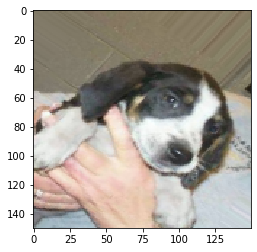

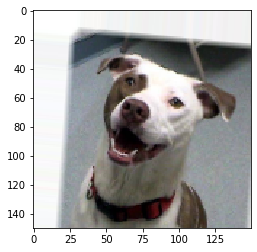

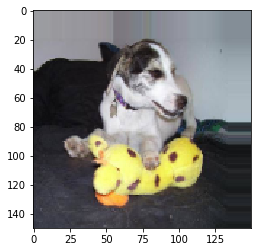

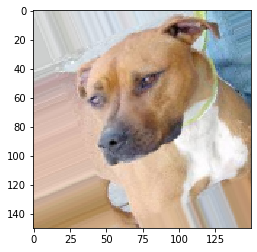

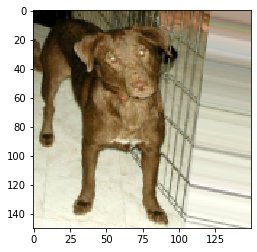

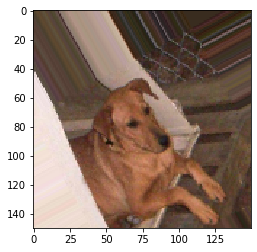

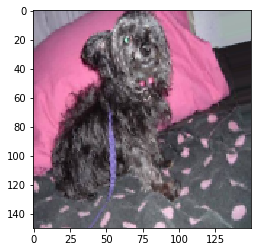

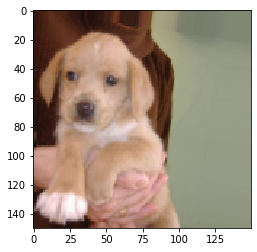

In [55]:
import numpy as np
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


# rotation_range는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
# width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
# shear_range는 랜덤하게 전단 변환을 적용할 각도 범위입니다.(양 측에서 찌그러트림)
# zoom_range는 랜덤하게 사진을 확대할 범위입니다.
# horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
# fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.


# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)])
             #os.listdir() 현재 폴더의 파일과 디렉토리가 리스트 형식으로 출력된다.


xy=[]
# 증식할 이미지 선택합니다
for i in range(10):
    
    img_path = fnames[i]

# 이미지를 읽고 크기를 변경합니다
    img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
    x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
    x = x.reshape((1,) + x.shape)
    xy.append(x)
    
    qq=len(xy)
xy= np.concatenate(xy, axis=0)
qq=qq    
# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0                                                            #초기 값을 항상 밖에!!!!!!!!
for batch in datagen.flow(xy, batch_size=4):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % qq== 0:
        break

plt.show()


# 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout 층을 추가하겠습니다

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


##데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련############


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [151]:
model.save('cats_and_dogs_small_2.h5')

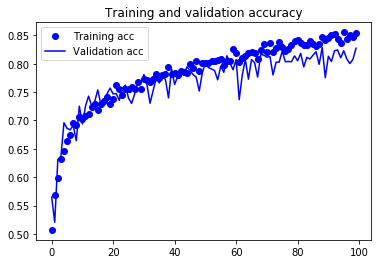

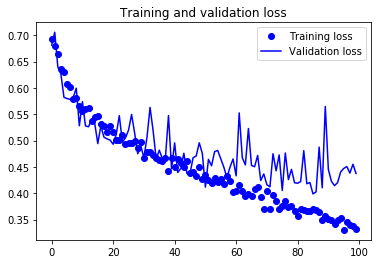

In [152]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
fnames[1]

'C:/Users/Affinity/Downloads/006975-master/006975-master/datasets/cat-dog\\train\\dogs\\dog.1.jpg'